<a href="https://colab.research.google.com/github/AyaElsawyElghaysh/DeepLearing/blob/main/Cifar10_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cirfar10 dataset and we apply DNN and later we will use the same dataset with CNN to better results

In [1]:
import tensorflow as tf 
from google.colab.patches import cv2_imshow
import cv2 as cv 
import numpy as np 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Activation,Dropout,Input,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

In [10]:
def checkShapes():
  print(f" X_trian.shape={X_train.shape}\n y_trian.shape ={y_train.shape}\n X_test.shape ={X_test.shape}\n y_test.shape ={y_test.shape}\n")
checkShapes()

 X_trian.shape=(50000, 32, 32, 3)
 y_trian.shape =(50000, 1)
 X_test.shape =(10000, 32, 32, 3)
 y_test.shape =(10000, 1)



#plotting some images

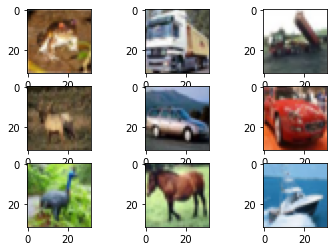

In [3]:
# plot first few images
for i in range(9):
  plt.subplot(331+i)
  plt.imshow(X_train[i])
plt.show()

#our targes info 

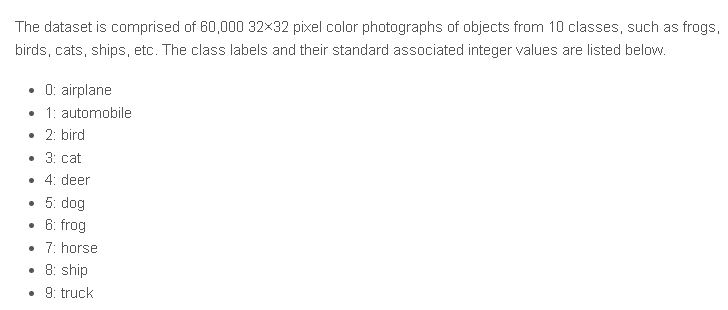



In [4]:
def showImage_label(x,y):
  plt.imshow(x)
  print("the image is ",y)

the image is  [9]


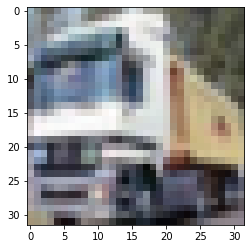

In [7]:
showImage_label(X_train[1],y_train[1])   #9 truck

#preprocessing on images

In [20]:
#labels
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [12]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [15]:
#we cannot deal with 3d array in fully connected nn so we should reshape it`s size
#but cnn can do this 
def reshapeImages(x_train,x_test):
  X_train=x_train.reshape(x_train.shape[0],(x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
  X_test=x_test.reshape(x_test.shape[0],(x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))
  return X_train,X_test

In [16]:
X_train,X_test=reshapeImages(X_train,X_train)

In [18]:
X_train.shape

(50000, 3072)

In [19]:
X_train,X_test=prep_pixels(X_train,X_test)

#define model 

In [26]:
# input_shape=X_train.shape[1:]
# input_shape

In [31]:
model=Sequential()
model.add(Dense(1000,activation="relu",input_shape=(32*32*3,)))
model.add(Dense(500,activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])

In [32]:
X_train,x_test,ytrain,y_test=train_test_split(X_train,y_train,train_size=.8,shuffle=True)

In [34]:
history_1=model.fit(X_train,ytrain,epochs=20,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/20
313/313 [==============================] - 15s 47ms/step - loss: 2.2638 - accuracy: 0.2184 - val_loss: 1.8963 - val_accuracy: 0.3068
Epoch 2/20
313/313 [==============================] - 14s 46ms/step - loss: 1.8612 - accuracy: 0.3247 - val_loss: 1.9515 - val_accuracy: 0.2952
Epoch 3/20
313/313 [==============================] - 14s 46ms/step - loss: 1.7615 - accuracy: 0.3702 - val_loss: 1.7118 - val_accuracy: 0.3952
Epoch 4/20
313/313 [==============================] - 15s 46ms/step - loss: 1.6926 - accuracy: 0.3920 - val_loss: 1.7663 - val_accuracy: 0.3878
Epoch 5/20
313/313 [==============================] - 14s 46ms/step - loss: 1.6337 - accuracy: 0.4157 - val_loss: 1.6147 - val_accuracy: 0.4225
Epoch 6/20
313/313 [==============================] - 14s 46ms/step - loss: 1.5831 - accuracy: 0.4333 - val_loss: 1.5804 - val_accuracy: 0.4350
Epoch 7/20
313/313 [==============================] - 15s 47ms/step - loss: 1.5449 - accuracy: 0.4467 - val_loss: 1.6170 - val_accuracy:

In [ ]:
#underfit problem occurs
#we solve this problem using cnn 

#prediction

In [35]:
prdec=model.predict(X_test)

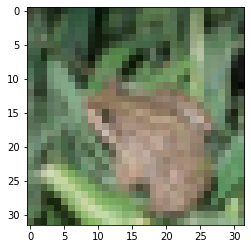

In [41]:
#show image and its label befor prediction 
plt.imshow(X_test[4])

In [42]:
#lebel befor model prediction 
y_train[4]

array([1], dtype=uint8)

In [36]:
prdec[4]

array([3.9187616e-01, 5.6202364e-01, 1.7327822e-05, 2.8099059e-06,
       1.2987287e-03, 1.9662191e-06, 9.1397494e-09, 9.6352342e-05,
       4.1626297e-02, 3.0567609e-03], dtype=float32)

In [37]:
np.argmax(prdec[4])

1